
📊 Evaluation Metrics:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00


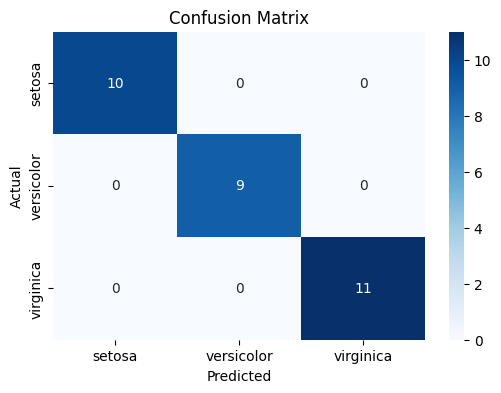


📝 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔮 Sample Prediction for input [5.8, 2.8, 5.1, 2.4] → Predicted Class: virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Step 2: Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

# Step 6: Accuracy and metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Classification Report
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 9: Predict sample input
sample_input = [[5.8, 2.8, 5.1, 2.4]]  # You can change this
predicted_class = model.predict(sample_input)[0]
print(f"\n🔮 Sample Prediction for input {sample_input[0]} → Predicted Class: {iris.target_names[predicted_class]}")


In [ ]:
# Naïve Bayes Classifier - Complete Guide

## 1. What is Naïve Bayes?

Naïve Bayes is a **probabilistic machine learning algorithm** used for **classification tasks**.
It is based on **Bayes' Theorem** and assumes that the **features are conditionally independent** given the class label — hence the term *“naïve.”*

---

## 2. Bayes' Theorem (Foundation)

Bayes' Theorem describes the probability of a class given a set of features.

### Formula:
P(C|X) = (P(X|C) * P(C)) / P(X)

markdown
Copy
Edit

Where:
- **P(C|X)**: Posterior probability of class **C** given features **X**
- **P(X|C)**: Likelihood of features **X** given class **C**
- **P(C)**: Prior probability of class **C**
- **P(X)**: Marginal probability of features **X**

Since **P(X)** is constant for all classes, we simplify to:
P(C|X) ∝ P(X|C) * P(C)

yaml
Copy
Edit

---

## 3. Naïve Assumption

It assumes **independence between all features**:
P(X|C) = P(x_1, x_2, ..., x_n|C) = P(x_1|C) * P(x_2|C) * ... * P(x_n|C)

yaml
Copy
Edit

This drastically **simplifies computation**.

---

## 4. Working Steps

1. **Calculate prior probabilities** P(C_k) for each class.
2. **Calculate likelihoods** P(x_i|C_k) for each feature given a class.
3. Use **Bayes' Theorem** to compute posterior probabilities.
4. **Predict** the class with the highest posterior probability.

---

## 5. Types of Naïve Bayes

| Type                | Use Case                                | Assumes                   |
|---------------------|-----------------------------------------|---------------------------|
| **Gaussian NB**      | Continuous data (e.g. Iris dataset)     | Features ~ Normal distribution |
| **Multinomial NB**   | Text classification (word counts)       | Counts or frequencies     |
| **Bernoulli NB**     | Binary/boolean features (e.g. spam filter) | Binary features         |

---

## 6. Gaussian Naïve Bayes Formula

If features are **continuous** and follow a **Gaussian distribution**, the likelihood is:
P(x_i|C) = (1 / √(2πσ_C^2)) * exp(-((x_i - μ_C)^2) / (2σ_C^2))

yaml
Copy
Edit
Where:
- **μ_C**: Mean of feature **x_i** for class **C**
- **σ_C^2**: Variance of feature **x_i** for class **C**

---

## 7. Advantages

- Simple, fast, and efficient.
- Performs well even with small data.
- Works well with high-dimensional data (e.g. text classification).
- Can handle missing values.

---

## 8. Limitations

- Assumes **independence** between features (not true in real life).
- Performs poorly when features are **correlated**.
- Struggles with **zero probabilities** (can be mitigated with Laplace Smoothing).

---

## 9. Laplace Smoothing

To avoid zero probabilities:
P(x_i|C) = (count(x_i, C) + 1) / (count(C) + k)

yaml
Copy
Edit
Where **k** = number of possible feature values.

---

## 10. Example (Text Classification)

Let's say you want to classify emails as *spam* or *ham*. You calculate:
- **P(spam)**, **P(ham)**
- **P(word_i|spam)**, **P(word_i|ham)**

Then multiply probabilities using the Naïve Bayes rule.

---

## 11. Viva Questions & Sample Answers

### Q1: What is Naïve Bayes?
**A:** It's a probabilistic classifier based on Bayes' Theorem with the assumption that features are conditionally independent given the class.

### Q2: Why is it called "naïve"?
**A:** Because it assumes all features are independent, which is rarely true in real-world data.

### Q3: Where is Naïve Bayes used?
**A:** In spam detection, sentiment analysis, medical diagnosis, document classification, etc.

### Q4: What is the main formula?
**A:** **P(C|X) = (P(X|C) * P(C)) / P(X)** — posterior is proportional to likelihood × prior.

### Q5: What are the types of Naïve Bayes?
**A:** Gaussian, Multinomial, and Bernoulli Naïve Bayes.

### Q6: How is Naïve Bayes different from other classifiers like SVM?
**A:** Naïve Bayes is probabilistic and interpretable, while SVM is margin-based and non-probabilistic.

### Q7: What is Laplace Smoothing?
**A:** It adds 1 to counts to avoid zero probabilities when a word or feature is unseen.

---

## Bonus: Performance Metrics Used

- **Accuracy**: `(TP + TN) / Total`
- **Precision**: `TP / (TP + FP)`
- **Recall**: `TP / (TP + FN)`
- **F1 Score**: Harmonic mean of precision and recall

---

## Summary for Last-Minute Revision:

| Concept        | Key Point                                                                 |
|----------------|---------------------------------------------------------------------------|
| Algorithm Type | Probabilistic, Supervised Classification                                  |
| Core Principle | Bayes' Theorem + Independence Assumption                                  |
| Used For       | Text classification, spam filtering, sentiment analysis                   |
| Assumes        | All features are independent given the class                              |
| Types          | Gaussian (continuous), Multinomial (counts), Bernoulli (binary)           |
| Formula        | **P(C|X) ∝ P(X|C) * P(C)**                                                |
| Limitation     | Poor performance with correlated features                                  |
| Advantage      | Simple, fast, works with small & large datasets                           |

---
